In [108]:
#import necessary python libraries
import pandas as pd

import matplotlib.pyplot as plt

import chardet

#Reading input CSVs

companies=pd.read_csv("F://AI ML//Invetment Assignment//companies.csv", encoding="palmos")


rounds2=pd.read_csv("F://AI ML//Invetment Assignment//rounds2.csv",encoding='palmos')



In [109]:
#data from first rows show 
companies.head(2)

#Companies Data Overview
companies.permalink.describe()

count                              66368
unique                             66368
top       /Organization/Accedo-Broadband
freq                                   1
Name: permalink, dtype: object

In [110]:
#making data unique in one format in lowercase
companies.permalink=companies.permalink.str.lower()
companies.permalink.describe()

count                     66368
unique                    66368
top       /organization/llustre
freq                          1
Name: permalink, dtype: object

In [111]:
#rounds2 data overview 
rounds2.head(3)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0


In [112]:
#making rounds2 data unique in one format in lowercase
rounds2['company_permalink']=rounds2['company_permalink'].str.lower()

In [113]:
#rounds2 data unique parameters
rounds2['company_permalink'].describe()

count                       114949
unique                       66368
top       /organization/solarflare
freq                            19
Name: company_permalink, dtype: object

In [114]:
#merge the  data frames comapnies with rounds2 in "master_frame"
master_frame=pd.merge(companies,rounds2,left_on='permalink',right_on='company_permalink')

In [115]:
#merged dat_frame
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [116]:
#merged dat_frame shape check to verify whether it has merged or not
master_frame.shape

(114949, 16)

In [117]:
#companies dataframe shape
companies.shape

(66368, 10)

In [118]:
#rounds2 dataframe shape
rounds2.shape

(114949, 6)

In [119]:
# Checking of unique companies from both dataframes whether they are same or different by creating set
a=set(companies['permalink'])
b=set(rounds2['company_permalink'])
c=a.intersection(b)
len(c)

66368

In [120]:
#writing to excel and checking whether results are matching or not
#writer = pd.ExcelWriter('F://AI ML//Invetment Assignment//master_frame.xlsx', engine='xlsxwriter',options={'strings_to_urls': False})
#master_frame.to_excel(writer)
#writer.close()

In [121]:
#Finding Representative funding amount of venture type i.e. mean 
#Answer -> Venture Type has mean of 1.174943e+07,angel -> 958694.5,seed->719818,private equity type -> 73308590
#Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, 
#investment type is the most suitable for them is Venture

master_frame.groupby(['funding_round_type'])['raised_amount_usd'].mean().sort_values(ascending=False)

funding_round_type
post_ipo_debt            1.687046e+08
post_ipo_equity          8.218249e+07
secondary_market         7.964963e+07
private_equity           7.330859e+07
undisclosed              1.924237e+07
debt_financing           1.704353e+07
venture                  1.174895e+07
grant                    4.300576e+06
convertible_note         1.453439e+06
product_crowdfunding     1.363131e+06
angel                    9.586945e+05
seed                     7.198180e+05
equity_crowdfunding      5.383682e+05
non_equity_assistance    4.112031e+05
Name: raised_amount_usd, dtype: float64

In [122]:
#Undrstanding values in each coumns of master_frame

master_frame.funding_round_type.value_counts()

venture                  55494
seed                     30524
debt_financing            6895
angel                     6094
undisclosed               4897
equity_crowdfunding       3257
private_equity            2285
grant                     2200
convertible_note          1817
post_ipo_equity            638
product_crowdfunding       410
non_equity_assistance      191
post_ipo_debt              152
secondary_market            95
Name: funding_round_type, dtype: int64

In [123]:
#Only accessing Venture type data fro master_frame

master_frame2=master_frame[master_frame['funding_round_type']=='venture']

master_frame2.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN


In [124]:
#Country Analysis

#By using groupby calculating sum of raised amount for different countries and sort by descending order
#Top 3 Only english countries from below results are USA,GBR,IND 

master_frame2.groupby(['country_code'])['raised_amount_usd'].sum().sort_values(ascending=False)

country_code
USA    4.225108e+11
CHN    3.983542e+10
GBR    2.024563e+10
IND    1.439186e+10
CAN    9.583332e+09
           ...     
MOZ    0.000000e+00
BHR    0.000000e+00
PSE    0.000000e+00
MKD    0.000000e+00
RWA    0.000000e+00
Name: raised_amount_usd, Length: 103, dtype: float64

In [125]:
#Read mapping CSV file

mapping=pd.read_csv("F://AI ML//Invetment Assignment//mapping.csv", encoding="palmos")


In [126]:
#Top 4 rows for undestanding data are shown

mapping.head(2)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0


In [127]:
#prepration for wide to long format
#idvars for melted dataframe

idvars=list(mapping.columns[0:1])
idvars

['category_list']

In [128]:
#prepration for wide to long format
#valuevars for melted dataframe

valuevars=list(mapping.columns[1:])
valuevars

['Automotive & Sports',
 'Blanks',
 'Cleantech / Semiconductors',
 'Entertainment',
 'Health',
 'Manufacturing',
 'News, Search and Messaging',
 'Others',
 'Social, Finance, Analytics, Advertising']

In [129]:
#wide to long dataframe

melted_df=pd.melt(mapping,id_vars=idvars,value_vars=valuevars)

In [130]:
#melted dataframe show

melted_df.head(3)

,category_list,variable,value
0,NaN,Automotive & Sports,0
1,3D,Automotive & Sports,0
2,3D Printing,Automotive & Sports,0


In [131]:
#melted dataframe with value ==1 and dropping data with zero

melted_df=melted_df[melted_df['value']==1]

In [132]:
#melted dataframe show

melted_df.head()

,category_list,variable,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1


In [133]:
#melted dataframe null values find in columns

melted_df.isnull().sum()

category_list    1
variable         0
value            0
dtype: int64

In [134]:
#melted dataframe null values row remove

melted_df=melted_df[~melted_df['category_list'].isnull()]

In [135]:
#melted dataframe shape after cleaning

melted_df.shape

(687, 3)

In [136]:
#melted dataframe cleaning

melted_df['category_list']=melted_df['category_list'].replace({'0':'na', '2.na' :'2.0'})



In [137]:
#melted dataframe column rename

melted_df=melted_df.rename(columns={'variable':'main_sector'})

In [138]:
#melted dataframe shape

melted_df.shape

(687, 3)

In [139]:
#melted dataframe drop column named 'value'

melted_df.drop('value',axis=1)

,category_list,main_sector
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports
...,...,...
6121,Social Recruiting,"Social, Finance, Analytics, Advertising"
6122,Social Television,"Social, Finance, Analytics, Advertising"
6123,Social Travel,"Social, Finance, Analytics, Advertising"
6134,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [140]:
#master dataframe null values percentage in required columns

master_frame2.isnull().sum(axis=0)/len(master_frame2['company_permalink'])*100


permalink                   0.000000
name                        0.000000
homepage_url                5.306880
category_list               2.039860
status                      0.000000
country_code                5.180740
state_code                  6.840379
region                      6.404296
city                        6.404296
founded_at                 20.166144
company_permalink           0.000000
funding_round_permalink     0.000000
funding_round_type          0.000000
funding_round_code         44.165135
funded_at                   0.000000
raised_amount_usd           9.489314
dtype: float64

In [141]:
#master_dataframe length check

len(master_frame2['company_permalink'])

55494

In [142]:
#master_frame2['category_list']=master_frame2['category_list'].dropna()
master_frame2.shape

(55494, 16)

In [143]:
#master dataframe2 dropping null values rows

master_frame2 = master_frame2[~(master_frame2['raised_amount_usd'].isnull() | master_frame2['country_code'].isnull() |
                             master_frame2['category_list'].isnull())]

In [144]:
#shape after master dataframe2 dropping null values rows

master_frame2.shape

(47809, 16)

In [145]:
#master dataframe2 cleaning

master_frame2['category_list']=master_frame2['category_list'].replace({'0':'na', '2.na' :'2.0'})

In [146]:
# the category list is a list of multiple sub-sectors separated by a pipe ,hence getting first category only as category list

master_frame2['category_list'] = master_frame2['category_list'].apply(lambda x: x.split('|')[0])

In [147]:
#master_frame2 show

master_frame2.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
10,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0
11,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0


In [148]:
#writing to excel for viewing results

#writer = pd.ExcelWriter('F://AI ML//Invetment Assignment//master_frame2.xlsx', engine='xlsxwriter',options={'strings_to_urls': False})
#master_frame2.to_excel(writer)
#writer.close()

In [149]:
#merge the two dataframes melted_df & master_frame2 on category list

master_frame_mappping=master_frame2.merge(melted_df,left_on='category_list',right_on='category_list')

In [150]:
# After merge master_frame_mappping is created and shown

master_frame_mappping.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,main_sector,value
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Entertainment,1
1,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,Entertainment,1
2,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,Entertainment,1
3,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,Entertainment,1
4,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,Entertainment,1


In [151]:
#master_frame_mappping null values count

master_frame_mappping.isnull().sum(axis=0)

permalink                      0
name                           0
homepage_url                2019
category_list                  0
status                         0
country_code                   0
state_code                   692
region                       578
city                         578
founded_at                  7974
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         20005
funded_at                      0
raised_amount_usd              0
main_sector                    0
value                          0
dtype: int64

In [152]:
#writer = pd.ExcelWriter('F://AI ML//Invetment Assignment//master_frame_mappping.xlsx', engine='xlsxwriter',options={'strings_to_urls': False})
#master_frame_mappping.to_excel(writer)
#writer.close()

In [153]:
#Sector Analysis 

#Answer to question table no 5.1 ,Top 3 sectors for country USA are 

#Others                                     8243
#Cleantech / Semiconductors                 7849
#Social, Finance, Analytics, Advertising    5146     


S1=master_frame_mappping[master_frame_mappping['country_code']=='USA']

#a.pivot_table(index='country_code',columns='main_sector',values='raised_amount_usd',aggfunc=['sum'])

S1['main_sector'].value_counts()

Others                                     8243
Cleantech / Semiconductors                 7849
Social, Finance, Analytics, Advertising    5156
News, Search and Messaging                 4301
Health                                     3263
Manufacturing                              2453
Entertainment                              1756
Automotive & Sports                         505
Name: main_sector, dtype: int64

In [154]:
#Sector Analysis 


#Answer to question table no 5.1 ,Top 3 sectors for country GBR are 

#Others                                     8243
#Cleantech / Semiconductors                 7849
#Social, Finance, Analytics, Advertising    5146     


S2=master_frame_mappping[master_frame_mappping['country_code']=='GBR']

#a.pivot_table(index='country_code',columns='main_sector',values='raised_amount_usd',aggfunc=['sum'])

S2['main_sector'].value_counts()



Others                                     507
Cleantech / Semiconductors                 433
Social, Finance, Analytics, Advertising    318
News, Search and Messaging                 241
Entertainment                              133
Manufacturing                              122
Health                                     118
Automotive & Sports                         44
Name: main_sector, dtype: int64

In [155]:
#Sector Analysis 

#Answer to question table no 5.1 ,Top 3 sectors for country IND are 

#Others                                     281
#News, Search and Messaging                 130
#Social, Finance, Analytics, Advertising     77

S3=master_frame_mappping[master_frame_mappping['country_code']=='IND']

#a.pivot_table(index='country_code',columns='main_sector',values='raised_amount_usd',aggfunc=['sum'])

S3['main_sector'].value_counts()

Others                                     281
News, Search and Messaging                 130
Social, Finance, Analytics, Advertising     77
Entertainment                               75
Manufacturing                               55
Cleantech / Semiconductors                  54
Health                                      42
Automotive & Sports                         31
Name: main_sector, dtype: int64

In [156]:
# C1 dataframe is created from master_frame_mappping having country as "USA" & main sector as "others"

C1=master_frame_mappping[(master_frame_mappping['main_sector']=='Others') & (master_frame_mappping['country_code']=='USA')]

In [157]:
v=C1['raised_amount_usd'].idxmax()

C1_answer=C1.loc[v,:]
C1_answer

permalink                                     /organization/social-finance
name                                                                  SoFi
homepage_url                                           http://www.sofi.com
category_list                                                    Education
status                                                           operating
country_code                                                           USA
state_code                                                              CA
region                                                         SF Bay Area
city                                                         San Francisco
founded_at                                                      01-04-2011
company_permalink                             /organization/social-finance
funding_round_permalink    /funding-round/1609f1ba4de61c4760c91dc69f4ae980
funding_round_type                                                 venture
funding_round_code       

In [158]:
# from C1 dataframe company with highest investment analyzed

C1.groupby(['permalink'])['raised_amount_usd'].sum().sort_values(ascending=False)


permalink
/organization/social-finance    1.365200e+09
/organization/snapchat          1.165100e+09
/organization/livingsocial      8.182250e+08
/organization/facebook          6.152000e+08
/organization/zenefits          5.815000e+08
                                    ...     
/organization/secret-space      5.000000e+03
/organization/peers-app         4.000000e+03
/organization/rewardsnap        2.667000e+03
/organization/ozmott            2.250000e+03
/organization/promisec          0.000000e+00
Name: raised_amount_usd, Length: 4632, dtype: float64

In [159]:
# C12 dataframe is created from master_frame_mappping having country as "USA" & main sector as "Cleantech / Semiconductors"

C12=master_frame_mappping[(master_frame_mappping['main_sector']=='Cleantech / Semiconductors') & (master_frame_mappping['country_code']=='USA')]

In [160]:
C12.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,main_sector,value
1361,/organization/10x-genomics,10X Genomics,http://10xgenomics.com,Biotechnology,operating,USA,CA,SF Bay Area,Pleasanton,01-01-2012,/organization/10x-genomics,/funding-round/563923487783bdeb5d0b7872f3d6b99a,venture,B,12-01-2015,55000000.0,Cleantech / Semiconductors,1
1362,/organization/10x-technologies,10X Technologies,http://10xtechnologies.com,Biotechnology,operating,USA,CA,SF Bay Area,Oakland,01-01-2012,/organization/10x-technologies,/funding-round/39c1441d5098875a925577d0f2ad3904,venture,B,12-01-2015,550000.0,Cleantech / Semiconductors,1
1363,/organization/20-20-gene-systems-inc,20/20 Gene Systems Inc.,http://2020gene.com,Biotechnology,operating,USA,MD,"Washington, D.C.",Rockville,01-05-2000,/organization/20-20-gene-systems-inc,/funding-round/1df118940a2af3f77ec91a53c2c2ca79,venture,NaN,23-09-2015,2037014.0,Cleantech / Semiconductors,1
1364,/organization/20-20-gene-systems-inc,20/20 Gene Systems Inc.,http://2020gene.com,Biotechnology,operating,USA,MD,"Washington, D.C.",Rockville,01-05-2000,/organization/20-20-gene-systems-inc,/funding-round/63f491aa5ca433cdd7e7e75b208b2fab,venture,NaN,25-09-2012,150000.0,Cleantech / Semiconductors,1
1365,/organization/20-20-gene-systems-inc,20/20 Gene Systems Inc.,http://2020gene.com,Biotechnology,operating,USA,MD,"Washington, D.C.",Rockville,01-05-2000,/organization/20-20-gene-systems-inc,/funding-round/e8f0f6679abd451e58a78cdbf26f6acd,venture,NaN,30-10-2015,2158413.0,Cleantech / Semiconductors,1


In [161]:
# from C12 dataframe company with highest investment analyzed

C12.groupby(['permalink'])['raised_amount_usd'].sum().sort_values(ascending=False)

permalink
/organization/freescale                  1.760000e+10
/organization/juno-therapeutics          1.159803e+09
/organization/better-place               7.750000e+08
/organization/brightsource-energy        5.820000e+08
/organization/greatpoint-energy          5.620000e+08
                                             ...     
/organization/responsive-energy-group    1.000000e+04
/organization/swarm-2                    1.000000e+04
/organization/sundance-diagnostics       5.513000e+03
/organization/canfield-medical-supply    2.750000e+03
/organization/cosmosid                   0.000000e+00
Name: raised_amount_usd, Length: 3776, dtype: float64

In [162]:
# C21 dataframe is created from master_frame_mappping having country as "GBR" & main sector as "others"

C21=master_frame_mappping[(master_frame_mappping['main_sector']=='Others') & (master_frame_mappping['country_code']=='GBR')]

In [163]:
C21.head(5)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,main_sector,value
8639,/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,A,09-10-2014,4000000.0,Others,1
8690,/organization/brainbow,Peak,http://www.peak.net/,Education,operating,GBR,H9,London,London,01-01-2012,/organization/brainbow,/funding-round/e03af44f798194f9f64fdff4cd37c2c6,venture,A,16-04-2015,7000000.0,Others,1
8727,/organization/digital-assess,Digital Assess,http://www.digitalassess.com,Education,operating,GBR,H9,London,London,01-01-2014,/organization/digital-assess,/funding-round/bb8042c81d3f0d9eb792e67cec80ca5c,venture,B,09-06-2015,3000000.0,Others,1
8775,/organization/fuse-universal,Fuse Universal,http://www.fuseuniversal.com,Education,operating,GBR,E8,GBR - Other,Shoreditch,01-01-2008,/organization/fuse-universal,/funding-round/22075c2848566d82555d291715522b21,venture,NaN,18-06-2015,10000000.0,Others,1
8783,/organization/guroo,Guroo,http://www.guroo.co.uk,Education,operating,GBR,D8,GBR - Other,Houghton Le Spring,NaN,/organization/guroo,/funding-round/90dc37021181b4afb72da8d62d8a8f75,venture,NaN,16-10-2008,759353.0,Others,1


In [164]:
# from C21 dataframe company with highest investment analyzed

C21.groupby(['permalink'])['raised_amount_usd'].sum().sort_values(ascending=False)

permalink
/organization/oneweb            500000000.0
/organization/farfetch          194500000.0
/organization/liquid-telecom    150000000.0
/organization/picochip          111500000.0
/organization/newvoicemedia     111300000.0
                                   ...     
/organization/skillsbite-com       120000.0
/organization/right-skills         100000.0
/organization/uni2                  83751.0
/organization/socii                 54000.0
/organization/cloudblocks           22414.0
Name: raised_amount_usd, Length: 347, dtype: float64

In [165]:
# C22 dataframe is created from master_frame_mappping having country as "GBR" & main sector as "Cleantech / Semiconductors"

C22=master_frame_mappping[(master_frame_mappping['main_sector']=='Cleantech / Semiconductors') & (master_frame_mappping['country_code']=='GBR')]

In [166]:
# from C22 dataframe company with highest investment analyzed

C22.groupby(['permalink'])['raised_amount_usd'].sum().sort_values(ascending=False)

permalink
/organization/immunocore                        320000000.0
/organization/reneuron-group                    150859892.0
/organization/circassia                         144630999.0
/organization/biovex                            133314585.0
/organization/kymab                             120400000.0
                                                   ...     
/organization/hadrian-electrical-engineering       151525.0
/organization/cellcap-technologies                 115819.0
/organization/critical-outcome-technologies         91516.0
/organization/sernova                               85077.0
/organization/topcat-research                       80606.0
Name: raised_amount_usd, Length: 274, dtype: float64

In [167]:
# C31 dataframe is created from master_frame_mappping having country as "IND" & main sector as "Others"

C31=master_frame_mappping[(master_frame_mappping['main_sector']=='Others') & (master_frame_mappping['country_code']=='IND')]

In [168]:
C31.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,main_sector,value
8670,/organization/applect-learning-systems-pvt-ltd,Applect Learning Systems Pvt. Ltd.,http://www.meritnation.com,Education,operating,IND,7,New Delhi,New Delhi,01-10-2008,/organization/applect-learning-systems-pvt-ltd,/funding-round/237335c2e1ca6213ebcb45abcee9ae66,venture,NaN,01-06-2015,4000000.0,Others,1
8671,/organization/applect-learning-systems-pvt-ltd,Applect Learning Systems Pvt. Ltd.,http://www.meritnation.com,Education,operating,IND,7,New Delhi,New Delhi,01-10-2008,/organization/applect-learning-systems-pvt-ltd,/funding-round/eb29dd74ae6f5b58ef9dc6951ee92102,venture,NaN,04-12-2013,1600000.0,Others,1
8695,/organization/ceon-solutions-pvt,CEON Solutions Pvt,http://ceon.in,Education,operating,IND,16,IND - Other,Nasrapur,01-01-2004,/organization/ceon-solutions-pvt,/funding-round/0ce74ac4898f7b115350931cc8598f07,venture,NaN,20-03-2007,688000.0,Others,1
8747,/organization/embibe,Embibe,http://embibe.com,Education,operating,IND,16,Mumbai,Mumbai,01-01-2012,/organization/embibe,/funding-round/86076a1164c9b877ea64c95bcfaa0581,venture,NaN,05-05-2014,4000000.0,Others,1
8756,/organization/experifun,Experifun,http://experifun.com,Education,operating,IND,19,Bangalore,Bangalore,01-01-2012,/organization/experifun,/funding-round/a78838af8a348f853b6e2e7cfc38391a,venture,NaN,27-11-2013,75000.0,Others,1


In [169]:
# from C31 dataframe company with highest investment analyzed

C31.groupby(['permalink'])['raised_amount_usd'].sum().sort_values(ascending=False)

permalink
/organization/flipkart                2.451000e+09
/organization/snapdeal                3.107000e+08
/organization/tata-teleservices       2.120000e+08
/organization/myntra                  1.587500e+08
/organization/pepperfry-com           1.280000e+08
                                          ...     
/organization/testbook-com            2.000000e+05
/organization/etown-india-services    1.100000e+05
/organization/experifun               7.500000e+04
/organization/sudiksha                7.500000e+04
/organization/egully                  5.000000e+04
Name: raised_amount_usd, Length: 181, dtype: float64

In [170]:
# C32 dataframe is created from master_frame_mappping having country as "IND" & main sector as "News, Search and Messaging"

C32=master_frame_mappping[(master_frame_mappping['main_sector']=='News, Search and Messaging') & (master_frame_mappping['country_code']=='IND')]

In [171]:
C32.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,main_sector,value
135,/organization/babajob,Babajob,http://www.babajob.com,Curated Web,operating,IND,19,Bangalore,Bangalore,27-08-2007,/organization/babajob,/funding-round/b72eaac5ea12ac0f50573ac3d6d46b8d,venture,B,28-04-2015,10000000.0,"News, Search and Messaging",1
159,/organization/bharat-matrimony,Bharat Matrimony,http://www.bharatmatrimony.com,Curated Web,operating,IND,25,Chennai,Chennai,12-03-1969,/organization/bharat-matrimony,/funding-round/e37673bc7b0f1dfd3782f8f7abdb9ec8,venture,B,05-02-2008,11750000.0,"News, Search and Messaging",1
190,/organization/bluestone-com,Bluestone.com,http://bluestone.com,Curated Web,operating,IND,19,Bangalore,Bangalore,01-01-2011,/organization/bluestone-com,/funding-round/452a7fc1f34df2d3dcda4e28234bc671,venture,A,24-01-2012,5000000.0,"News, Search and Messaging",1
191,/organization/bluestone-com,Bluestone.com,http://bluestone.com,Curated Web,operating,IND,19,Bangalore,Bangalore,01-01-2011,/organization/bluestone-com,/funding-round/cac1371e6c9a38eb8e8409b2ebca9ec8,venture,C,09-07-2015,15800000.0,"News, Search and Messaging",1
192,/organization/bluestone-com,Bluestone.com,http://bluestone.com,Curated Web,operating,IND,19,Bangalore,Bangalore,01-01-2011,/organization/bluestone-com,/funding-round/f5b252d6442ce231bb01586ca1821f63,venture,B,18-03-2014,10000000.0,"News, Search and Messaging",1


In [172]:
# from C32 dataframe company with highest investment analyzed

C32.groupby(['permalink'])['raised_amount_usd'].sum().sort_values(ascending=False)

permalink
/organization/quikr-india             346000000.0
/organization/freecharge              113000000.0
/organization/micromax-informatics     88000000.0
/organization/hike                     86000000.0
/organization/indiahomes               75776000.0
                                         ...     
/organization/railyatri                  486000.0
/organization/smartpocket                240000.0
/organization/room-n-house               166396.0
/organization/youtellme                  100000.0
/organization/zify                        40000.0
Name: raised_amount_usd, Length: 87, dtype: float64

In [173]:
# dataframe for plot1 created from master_frame

plot1_graph=master_frame.groupby(['funding_round_type'])['raised_amount_usd'].mean().sort_values(ascending=False)

In [174]:
plot1_graph

funding_round_type
post_ipo_debt            1.687046e+08
post_ipo_equity          8.218249e+07
secondary_market         7.964963e+07
private_equity           7.330859e+07
undisclosed              1.924237e+07
debt_financing           1.704353e+07
venture                  1.174895e+07
grant                    4.300576e+06
convertible_note         1.453439e+06
product_crowdfunding     1.363131e+06
angel                    9.586945e+05
seed                     7.198180e+05
equity_crowdfunding      5.383682e+05
non_equity_assistance    4.112031e+05
Name: raised_amount_usd, dtype: float64

In [175]:
# dataframe for plot1 created from master_frame

plot1=master_frame[(master_frame['funding_round_type']=='private_equity') | (master_frame['funding_round_type']=='venture') | (master_frame['funding_round_type']=='angel') | (master_frame['funding_round_type']=='seed')]

In [176]:
# importing required libraries to plotting graphs

import seaborn as sns
import matplotlib.pyplot as plt


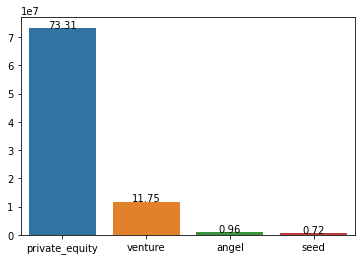

In [186]:
#PLOT1 the representative amount of investment for each funding type

r1=plot1.groupby(['funding_round_type'])['raised_amount_usd'].mean().sort_values(ascending=False)

x_plot1=list(r1.index)
y_plot1=list(r1)

p1=sns.barplot(x=x_plot1,y=y_plot1)


i=1

for i in p1.patches:
    p1.text(i.get_x()+i.get_width()*0.5,i.get_height(),round(i.get_height()/1e6,2), color='black', ha="center")
    
plt.savefig('F:/AI ML/Invetment Assignment/Submission/plot1.png')
plt.show()
   

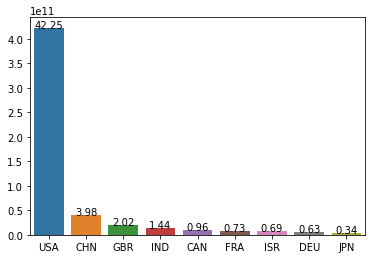

In [187]:
#PLOT2  plot showing the top 9 countries against the total amount of investments of funding type FT

plot2=master_frame[master_frame['funding_round_type']=='venture']

plot_2=plot2.groupby(['country_code'])['raised_amount_usd'].sum().sort_values(ascending=False)


x_plot2_all=list(plot_2.index)
y_plot2_all=list(plot_2)

x_plot2=x_plot2_all[0:9]
y_plot2=y_plot2_all[0:9]

p2=sns.barplot(x=x_plot2,y=y_plot2)


i=1

for i in p2.patches:
    p2.text(i.get_x()+i.get_width()*0.5,i.get_height(),round(i.get_height()/1e10,2), color='black', ha="center")
    
plt.savefig('F:/AI ML/Invetment Assignment/Submission/plot2.png')
plt.show()

In [179]:
#A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart
pplot31=master_frame_mappping[master_frame_mappping['country_code']=='USA']
plot31 = pplot31[pplot31['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising", "Cleantech / Semiconductors"])]

pplot32=master_frame_mappping[master_frame_mappping['country_code']=='GBR']
plot32 = pplot32[pplot32['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising", "Cleantech / Semiconductors"])]

pplot33=master_frame_mappping[master_frame_mappping['country_code']=='IND']
plot33 = pplot33[pplot33['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising", "News, Search and Messaging"])]

In [180]:
d1=plot31['main_sector'].value_counts().sort_values(ascending=False)

In [181]:
d1[0:4]

Others                                     8243
Cleantech / Semiconductors                 7849
Social, Finance, Analytics, Advertising    5156
Name: main_sector, dtype: int64

In [182]:
d2=plot32['main_sector'].value_counts().sort_values(ascending=False)

d2[0:4]



Others                                     507
Cleantech / Semiconductors                 433
Social, Finance, Analytics, Advertising    318
Name: main_sector, dtype: int64

In [183]:
d3=plot33['main_sector'].value_counts().sort_values(ascending=False)

d3[0:4]

Others                                     281
News, Search and Messaging                 130
Social, Finance, Analytics, Advertising     77
Name: main_sector, dtype: int64

In [184]:
result=pd.concat([plot31,plot32,plot33])


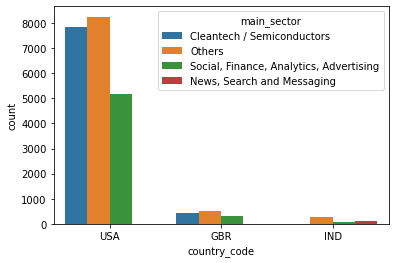

<Figure size 7200x7200 with 0 Axes>

In [189]:
import numpy as np
sns.countplot(x='country_code', hue="main_sector", data=result)
plt.figure(figsize=(100,100))
plt.savefig('F:/AI ML/Invetment Assignment/Submission/plot3.png')
plt.show()
